# Machine Learning for Data Analysis
### Week 4: Running a k-means Cluster Analysis

A k-means cluster analysis was conducted to identify underlying subgroups of countries based on their similarity of responses on 7 variables that represent characteristics that could have an impact on internet use rates. Clustering variables included quantitative variables measuring income per person, employment rate, female employment rate, polity score, alcohol consumption, life expectancy, and urban rate. All clustering variables were standardized to have a mean of 0 and a standard deviation of 1.

Because the GapMinder dataset which I am using is relatively small (N < 250), I have not split the data into test and training sets. A series of k-means cluster analyses were conducted on the training data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret.

Load the data, set the variables to numeric, and clean the data of NA values

In [87]:
'''
Code for Peer-graded Assignments: Running a k-means Cluster Analysis
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

data = pd.read_csv('c:/users/greg/desktop/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
data['alcconsumption'] = pd.to_numeric(data['alcconsumption'], errors='coerce')
data['lifeexpectancy'] = pd.to_numeric(data['lifeexpectancy'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')
 
sub1 = data.copy()

data_clean = sub1.dropna()

Subset the clustering variables

In [88]:
cluster = data_clean[['internetuserate', 'incomeperperson','employrate','femaleemployrate','polityscore',
'alcconsumption', 'lifeexpectancy', 'urbanrate']]
cluster.describe()

,internetuserate,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,urbanrate
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,32.659142,6790.695858,59.261333,48.100667,3.893333,6.821733,68.981987,55.073200
std,27.688447,9861.868327,10.380465,14.780999,6.248916,5.121911,9.908796,22.558074
min,0.210066,103.775857,34.900002,12.400000,-10.000000,0.050000,48.132000,10.400000
25%,8.529589,592.269592,52.199999,39.599998,-1.750000,2.562500,62.467500,36.415000
50%,26.608624,2231.334855,58.900002,48.549999,7.000000,6.000000,72.558500,57.230000
75%,51.755758,7222.637721,65.000000,55.725000,9.000000,10.057500,76.069750,71.565000
max,93.277508,39972.352768,83.199997,83.300003,10.000000,23.010000,83.394000,100.000000


Standardize the clustering variables to have mean = 0 and standard deviation = 1

In [89]:
clustervar=cluster.copy()
clustervar['internetuserate'] = preprocessing.scale(clustervar['internetuserate'].astype('float64'))
clustervar['incomeperperson'] = preprocessing.scale(clustervar['incomeperperson'].astype('float64'))
clustervar['employrate'] = preprocessing.scale(clustervar['employrate'].astype('float64'))
clustervar['femaleemployrate'] = preprocessing.scale(clustervar['femaleemployrate'].astype('float64'))
clustervar['polityscore'] = preprocessing.scale(clustervar['polityscore'].astype('float64'))
clustervar['alcconsumption'] = preprocessing.scale(clustervar['alcconsumption'].astype('float64'))
clustervar['lifeexpectancy'] = preprocessing.scale(clustervar['lifeexpectancy'].astype('float64'))
clustervar['urbanrate'] = preprocessing.scale(clustervar['urbanrate'].astype('float64'))

Split the data into train and test sets

In [90]:
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

Perform k-means cluster analysis for 1-9 clusters

In [91]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []
 
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(clus_train)
    clusassign = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

Plot average distance from observations from the cluster centroid to use the Elbow Method to identify number of clusters to choose

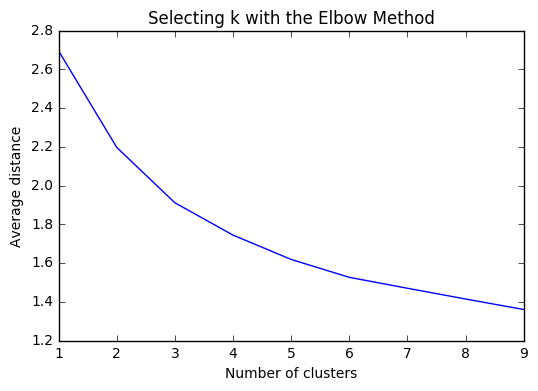

In [92]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

Interpret 3 cluster solution

In [93]:
model3 = KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign = model3.predict(clus_train)

Plot the clusters

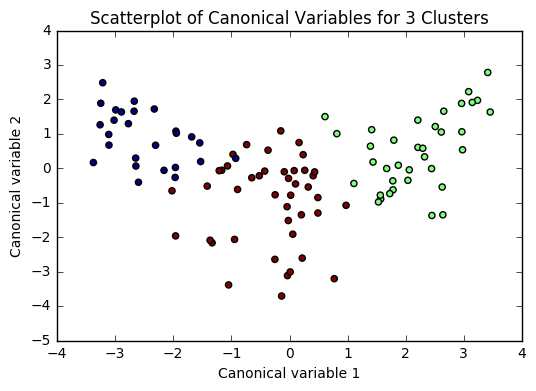

In [94]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plt.figure()
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

#### Begin multiple steps to merge cluster assignment with clustering variables to examine cluster variable means by cluster.

Create a unique identifier variable from the index for the cluster training data to merge with the cluster assignment variable.

In [95]:
clus_train.reset_index(level=0, inplace=True)

Create a list that has the new index variable

In [96]:
cluslist = list(clus_train['index'])

Create a list of cluster assignments

In [97]:
labels = list(model3.labels_)

Combine index variable list with cluster assignment list into a dictionary

In [98]:
newlist = dict(zip(cluslist, labels))
print (newlist)

{2: 2, 4: 1, 6: 0, 10: 0, 11: 2, 14: 1, 16: 2, 17: 0, 19: 1, 22: 1, 24: 2, 27: 2, 28: 1, 29: 1, 31: 1, 32: 0, 35: 1, 37: 2, 38: 1, 39: 2, 42: 1, 45: 1, 47: 2, 53: 2, 54: 2, 55: 2, 56: 2, 58: 1, 59: 0, 63: 0, 64: 0, 66: 2, 67: 1, 68: 2, 69: 0, 70: 1, 72: 0, 77: 2, 78: 1, 79: 1, 80: 2, 84: 0, 88: 2, 89: 2, 90: 0, 91: 0, 92: 0, 93: 2, 94: 0, 95: 2, 97: 1, 100: 0, 102: 1, 103: 1, 104: 0, 105: 2, 106: 1, 107: 1, 108: 2, 113: 2, 114: 1, 115: 1, 116: 2, 123: 2, 126: 2, 128: 2, 131: 1, 133: 2, 135: 1, 136: 0, 139: 0, 140: 2, 141: 1, 142: 2, 144: 0, 145: 2, 148: 2, 149: 1, 150: 1, 151: 2, 152: 2, 153: 0, 154: 0, 158: 2, 159: 2, 160: 1, 173: 0, 175: 0, 178: 2, 179: 0, 180: 2, 183: 1, 184: 0, 186: 2, 188: 1, 194: 2, 196: 2, 197: 1, 200: 2, 201: 0, 205: 1, 208: 1, 210: 2, 211: 1, 212: 1}


Convert newlist dictionary to a dataframe

In [99]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')
newclus

,0
2,2
4,1
6,0
10,0
11,2
14,1
16,2
17,0
19,1
22,1


Rename the cluster assignment column

In [100]:
newclus.columns = ['cluster']

#### Repeat previous steps for the cluster assignment variable

Create a unique identifier variable from the index for the cluster assignment dataframe to merge with cluster training data

In [101]:
newclus.reset_index(level=0, inplace=True)

Merge the cluster assignment dataframe with the cluster training variable dataframe by the index variable

In [102]:
merged_train = pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)

,index,internetuserate,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,urbanrate,cluster
0,159,0.388004,-0.393486,-0.044591,0.386877,0.017127,1.843020,-0.016099,0.790241,2
1,196,0.259495,-0.146720,-1.591112,-1.778529,0.498818,-0.744736,0.505990,0.605211,2
2,70,-0.837412,-0.654365,0.564351,1.086052,0.659382,-0.727105,-0.481382,-0.224759,1
3,29,-1.107368,-0.679157,2.313852,2.389369,0.338255,0.554040,-1.880471,-1.986999,1
4,53,0.249026,-0.278924,-0.634202,-0.515941,0.659382,-0.106122,0.446957,0.620333,2
5,153,1.080305,-0.021869,-1.020832,-0.407332,0.980510,1.490411,0.723392,0.277849,0
6,35,-1.100127,-0.666519,1.163628,1.004595,-0.785693,-0.715352,-2.084304,-0.733593,1
7,14,-1.049396,-0.634110,0.854323,0.373301,0.177691,-1.303033,-0.003846,-1.242428,1
8,116,0.856678,-0.163394,0.119726,-0.339451,0.338255,-1.165907,0.530495,0.679934,2
9,126,0.270441,-0.630263,-1.446126,-0.305510,0.659382,3.171179,0.033923,-0.592152,2


Cluster frequencies

In [103]:
merged_train.cluster.value_counts()

2    43
1    36
0    26
Name: cluster, dtype: int64

Calculate clustering variable means by cluster

In [104]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
clustergrp

Clustering variable means by cluster


,index,internetuserate,incomeperperson,employrate,femaleemployrate,polityscore,alcconsumption,lifeexpectancy,urbanrate
cluster,,,,,,,,,
0,103.269231,1.423121,1.389060,-0.234189,0.005960,0.733489,0.824072,1.069833,0.871090
1,102.027778,-0.859151,-0.625386,0.868554,0.881654,-0.549307,-0.486482,-0.996354,-0.865027
2,106.232558,-0.151875,-0.359561,-0.694669,-0.667332,0.039531,0.010913,0.187094,0.222592


Validate clusters in training data by examining cluster differences in internetuserate using ANOVA. First, merge internetuserate with clustering variables and cluster assignment data

In [105]:
internetuserate_data = data_clean['internetuserate']

Split internetuserate data into train and test sets

In [122]:
internetuserate_train, internetuserate_test = train_test_split(internetuserate_data, test_size=.3, random_state=123)
internetuserate_train1 = pd.DataFrame(internetuserate_train)
internetuserate_train1.reset_index(level=0, inplace=True)
merged_train_all = pd.merge(internetuserate_train1, merged_train, on='index')
sub5 = merged_train_all[['internetuserate_x', 'cluster']].dropna()

In [123]:
internetuserate_mod = smf.ols(formula='internetuserate_x ~ C(cluster)', data=sub5).fit()
internetuserate_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      internetuserate_x   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     177.4
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           6.18e-34
Time:                        18:23:10   Log-Likelihood:                -417.76
No. Observations:                 105   AIC:                             841.5
Df Residuals:                     102   BIC:                             849.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          71.9316      2.573     27.953      0.000        66.828    77.036
C(cluster)[T.1]   -62.9816      3.377    -18.650      0.000       -69.680   -56.283
C(cluster)[T.2]   -43.4636      3.260    -13.334      0.000       -49.929   -36.998
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.055
Skew:                          -0.014   Prob(JB):                        0.973
Kurtosis:                       2.892   Cond. No.                         4.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Means for internetuserate by cluster

In [112]:
m1= sub5.groupby('cluster').mean()
m1

,internetuserate_x
cluster,
0,71.931581
1,8.950009
2,28.467992


Standard deviations for internetuserate by cluster

In [113]:
m2= sub5.groupby('cluster').std()
m2

,internetuserate_x
cluster,
0,14.040784
1,8.485127
2,15.516733


In [115]:
mc1 = multi.MultiComparison(sub5['internetuserate_x'], sub5['cluster'])
res1 = mc1.tukeyhsd()
res1.summary()

group1,group2,meandiff,lower,upper,reject
0,1,-62.9816,-71.0139,-54.9493,True
0,2,-43.4636,-51.2169,-35.7103,True
1,2,19.518,12.4676,26.5683,True


The elbow curve was inconclusive, suggesting that the 2, 4, 6, and 8-cluster solutions might be interpreted. The results above are for an interpretation of the 4-cluster solution.

In order to externally validate the clusters, an Analysis of Variance (ANOVA) was conducting to test for significant differences between the clusters on internet use rate. A tukey test was used for post hoc comparisons between the clusters. Results indicated significant differences between the clusters on internet use rate (F=71.17, p<.0001). The tukey post hoc comparisons showed significant differences between clusters on internet use rate, with the exception that clusters 0 and 2 were not significantly different from each other. Countries in cluster 1 had the highest internet use rate (mean=75.2, sd=14.1), and cluster 3 had the lowest internet use rate (mean=8.64, sd=8.40).